# Boston Housing Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle


# Exploratory Data Analysis

In [2]:
# Load the Boston Housing dataset
boston = load_boston()

# Convert the data to a pandas DataFrame
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [26]:
# null data check
data[data.isna().any(axis=1) | data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


# Split the data into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data[boston.feature_names], data['PRICE'], test_size=0.2, random_state=42)

# Fit regression models

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [5]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [6]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [7]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaluate performance on test data

In [8]:
models = {'Linear Regression': lr, 'Ridge Regression': ridge, 'Lasso Regression': lasso, 'Random Forest Regression': rf}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('{}\nMSE: {}\nR2: {}\n'.format(name, mse, r2))

Linear Regression
MSE: 24.291119474973318
R2: 0.6687594935356347

Ridge Regression
MSE: 24.377609808756375
R2: 0.6675800871276225

Lasso Regression
MSE: 25.15559375393417
R2: 0.6569712802223937

Random Forest Regression
MSE: 7.901513892156864
R2: 0.8922527442109116



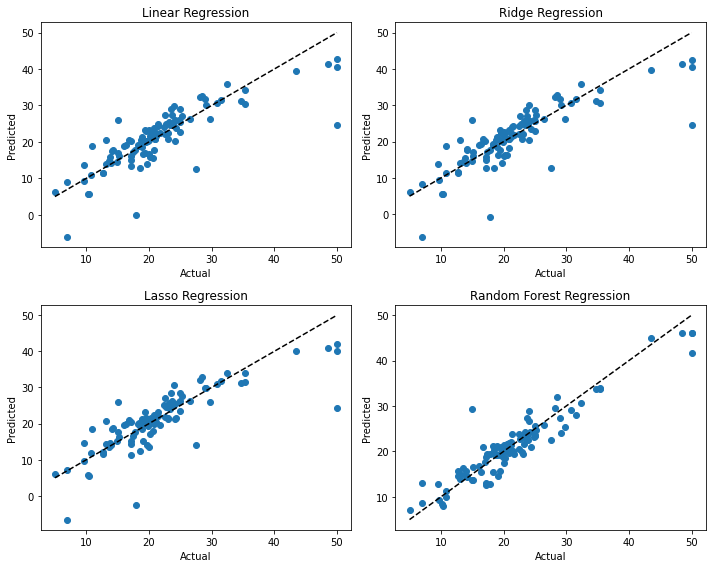

In [9]:
# Plot predicted vs. actual values for each model
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs = axs.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    axs[i].scatter(y_test, y_pred)
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    axs[i].set_xlabel('Actual')
    axs[i].set_ylabel('Predicted')
    axs[i].set_title(name)

plt.tight_layout()
plt.show()

We utilized scikit-learn to import and train various regression models, such as Linear Regression, Ridge Regression, Lasso Regression, and Random Forest Regression. We assessed the models' effectiveness on the test data by computing the mean squared error (MSE) and R-squared (R2) metrics. To compare the performance of each model, we generated a visual representation using matplotlib by plotting the predicted values against the actual values of the test data.

# Since Random Forest Regression has lowest MSE we save this model to a pickle file

In [11]:
with open('prediction.pkl', 'wb') as f:
    pickle.dump(rf, f)

Pickle files are a convenient way to integrate machine learning models with web applications. After creating Pickle files, there are different ways to integrate them with web applications but one common approach is to load the pickled model into memory when the web application starts up. This can be done using the following steps:
1. Load the pickle file in the web application using the 'pickle.load' function. This will deserialize the model and make it available for use in the application.

2. Use the loaded model to make predictions on new data in the web application. The input data can be collected from the user interface and passed to the model as input for prediction. The predicted results can then be displayed back to the user through the web interface.

Since pickle files are platform-independent and can be easily loaded into memory, they can be a useful tool to integrate machine learning models with web applications. However, it's essential to keep the pickled model files secure because they may contain sensitive information that should not be disclosed.